## Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [8]:
! ls

Linear_Regression.ipynb  NBA.csv		  README.md
Makefile		 NBA.csv:Zone.Identifier  tests


In [9]:
# YOUR CODE HERE
data = pd.read_csv("NBA.csv")
data = data.sample(frac=1)
data.head()

,season,poss,mp,do_ratio,pacing,win_rating
2927,2006,3948,2034,-2.987376,-0.204238,1.075503
1989,2010,2156,1117,-2.212992,-0.663753,-1.525216
1733,2012,2665,1421,-0.435754,-0.399112,4.345243
2812,1992,1900,916,-2.151660,0.288587,0.364586
3000,2003,201,106,-2.148615,0.465620,0.062756


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [10]:
# YOUR CODE HERE
nba_data = data[['win_rating', 'mp']]

nba_data.head()

,win_rating,mp
2927,1.075503,2034
1989,-1.525216,1117
1733,4.345243,1421
2812,0.364586,916
3000,0.062756,106


👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

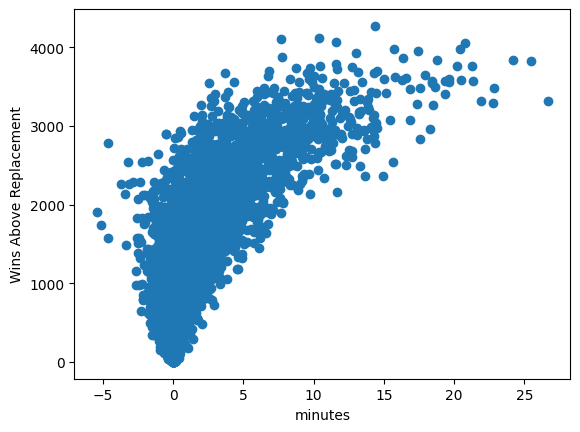

In [11]:
# YOUR CODE HERE
# Plot Living area vs Sale price
plt.scatter(nba_data['win_rating'], nba_data['mp'])

# Labels
plt.xlabel("minutes")
plt.ylabel("Wins Above Replacement")

plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [38]:
# YOUR CODE HERE
# Import the model
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = nba_data[['mp']]
y = nba_data['win_rating']

# Train the model on the data
model.fit(X, y)

LinearRegression()

In [39]:
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
print(cv_results['test_score'])

# Mean of scores
cv_results['test_score'].mean()

[0.52893258 0.54228361 0.55046767 0.61599313 0.56675538]


0.5608864744029367

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [40]:
# Extract test scores from cv_results
test_scores = cv_results['test_score']

# Find the minimum score
min_score = min(test_scores)
min_score

0.5289325844358757

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [41]:
# YOUR CODE HERE
#find the maximun score
max_score = max(test_scores)
max_score

0.6159931283512546

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [42]:
# YOUR CODE HERE
# Mean of scores
mean_score = cv_results['test_score'].mean()
mean_score

0.5608864744029367

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [43]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/thais/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/thais/code/ThaisGaspar/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [44]:
# YOUR CODE HERE
import time
# Initialize lists to store results
k_values = range(2, 21)
mean_scores = []
total_times = []

# Define the model
model = LinearRegression()

# Loop through each value of K
for k in k_values:
    # Start timing
    start_time = time.time()
    
    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=k)
    
    # Calculate mean score
    mean_score = cv_results['test_score'].mean()
    
    # End timing
    end_time = time.time()
    
    # Calculate total time
    total_time = end_time - start_time
    
    # Append mean score and total time to lists
    mean_scores.append(mean_score)
    total_times.append(total_time)


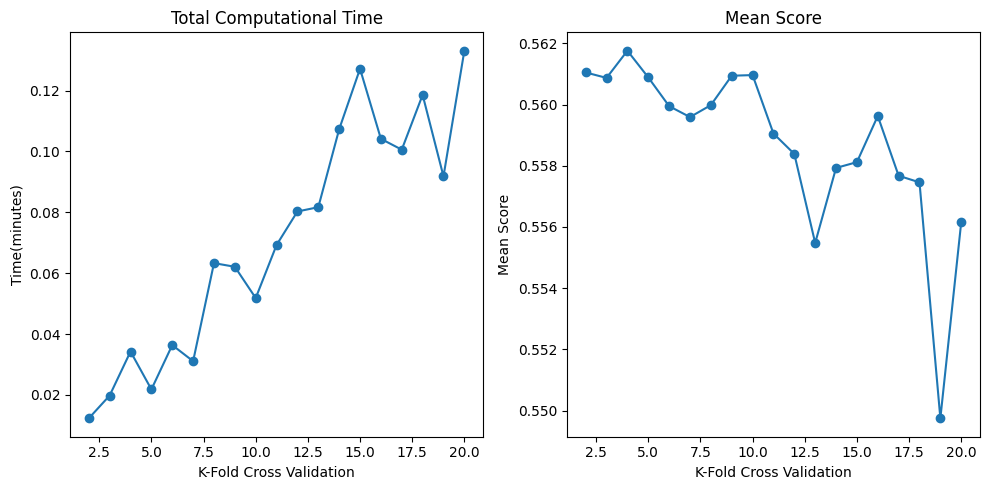

In [45]:
# Plot the results
plt.figure(figsize=(10, 5))

# Plot total computational time
plt.subplot(1, 2, 1)
plt.plot(k_values, total_times, marker='o')
plt.title('Total Computational Time')
plt.xlabel('K-Fold Cross Validation')
plt.ylabel('Time(minutes)')

# Plot mean score
plt.subplot(1, 2, 2)
plt.plot(k_values, mean_scores, marker='o')
plt.title('Mean Score')
plt.xlabel('K-Fold Cross Validation')
plt.ylabel('Mean Score')

plt.tight_layout()
plt.show()

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [48]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [53]:
# YOUR CODE HERE
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [54]:
# YOUR CODE HERE

intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [55]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/thais/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/thais/code/ThaisGaspar/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [56]:
# YOUR CODE HERE
prediction = model.predict([[1000]])
prediction

/home/thais/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.056205])

### ☑️ Test your code

In [57]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/thais/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/thais/code/ThaisGaspar/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [58]:
data.head()

,season,poss,mp,do_ratio,pacing,win_rating
2927,2006,3948,2034,-2.987376,-0.204238,1.075503
1989,2010,2156,1117,-2.212992,-0.663753,-1.525216
1733,2012,2665,1421,-0.435754,-0.399112,4.345243
2812,1992,1900,916,-2.151660,0.288587,0.364586
3000,2003,201,106,-2.148615,0.465620,0.062756


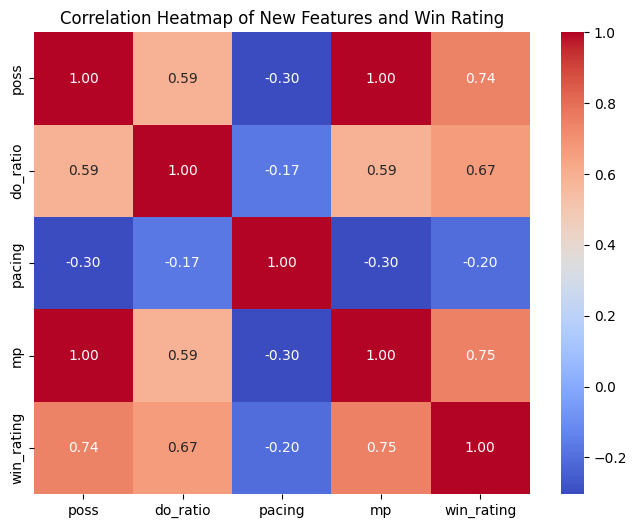

In [59]:
# Create a DataFrame with the new features and win_rating
df_new_features = data[['poss', 'do_ratio', 'pacing', 'mp', 'win_rating']]

# Compute the correlation matrix
correlation_matrix = df_new_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of New Features and Win Rating')
plt.show()

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [63]:
# YOUR CODE HERE

# Create a new DataFrame with two columns: selected_feature, minutes played (mp), and win_rating
new_data = pd.DataFrame({'poss': df_new_features['poss'],
                         'do_ratio': df_new_features['do_ratio'],
                         'win_rating': df_new_features['win_rating']})
new_data

,poss,do_ratio,win_rating
2927,3948,-2.987376,1.075503
1989,2156,-2.212992,-1.525216
1733,2665,-0.435754,4.345243
2812,1900,-2.151660,0.364586
3000,201,-2.148615,0.062756
...,...,...,...
2395,2941,-2.156854,-0.422282
2155,2528,0.951233,3.096170
292,1244,-1.157651,-0.131669
3001,547,-5.110962,-0.333916


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [66]:
# YOUR CODE HERE
# Define the features and target variable
X_new = new_data[['poss', 'do_ratio']]  # Features
y_new = new_data['win_rating']  # Target variable

# Initialize the linear regression model
model_new = LinearRegression()

# Compute the cross-validation scores
cross_val_scores = cross_val_score(model_new, X_new, y_new, cv=5)

# Compute the mean score
mean_2_feat_score = cross_val_scores.mean()

### ☑️ Test your code

In [67]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/thais/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/thais/code/ThaisGaspar/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁